# Spam dataset with ensemble methods

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

In [2]:
spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9],
    'Sale':[1,2,3,3,6,7,9,10,5,8,4,6],
    'Spam': [0,0,0,0,0,0,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

spam_dataset

,Lottery,Sale,Spam
0,7,1,0
1,3,2,0
2,9,3,0
3,1,3,0
4,2,6,0
5,4,7,0
6,1,9,1
7,3,10,1
8,6,5,1
9,7,8,1


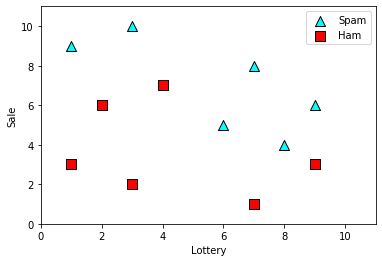

In [3]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']

utils.plot_points(X, y)

In [4]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier(random_state=0)
spam_decision_tree.fit(X,y)
spam_decision_tree.score(X,y)

1.0

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


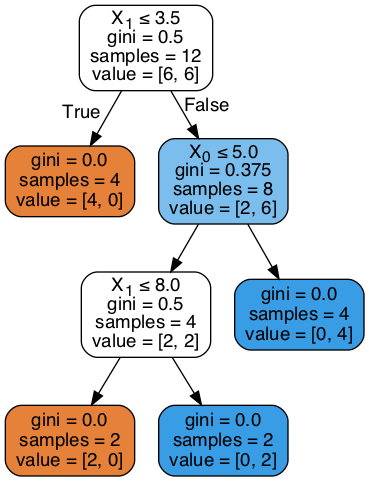

In [5]:
utils.display_tree(spam_decision_tree)

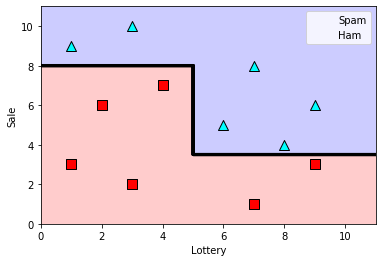

In [6]:
utils.plot_model(X, y, spam_decision_tree)

# Now with a slightly modified dataset

In [34]:
new_spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,8,2,1,3,6,7,8,9],
    'Sale':   [1,2,3,3,6,7,6,2,9,10,5,8,4,6],
    'Spam':   [0,0,0,0,0,0,1,1,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

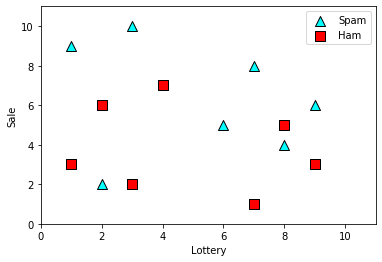

In [8]:
new_X = new_spam_dataset[['Lottery', 'Sale']]
new_y = new_spam_dataset['Spam']
utils.plot_points(new_X, new_y)

In [9]:
new_spam_decision_tree = DecisionTreeClassifier(random_state=0)
new_spam_decision_tree.fit(new_X,new_y)
new_spam_decision_tree.score(new_X,new_y)

1.0

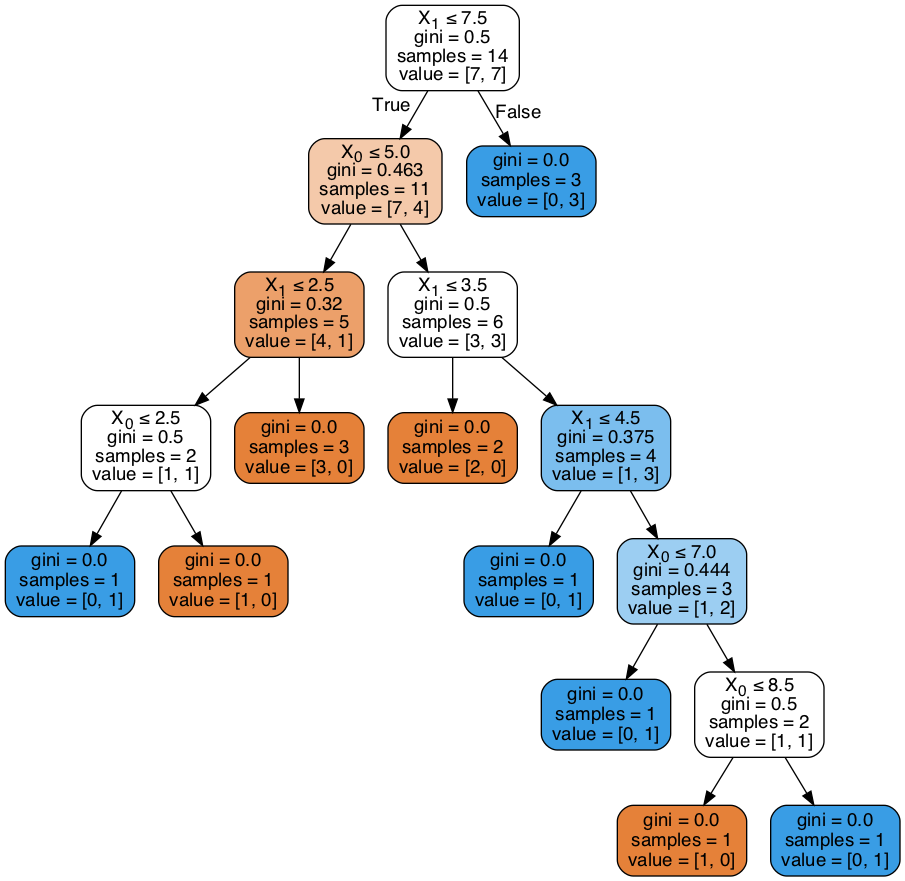

In [10]:
utils.display_tree(new_spam_decision_tree)

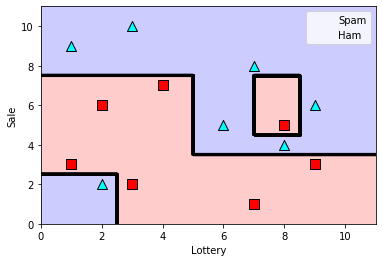

In [11]:
utils.plot_model(new_X, new_y, new_spam_decision_tree)

# Random Forests

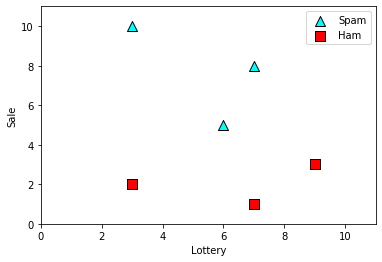

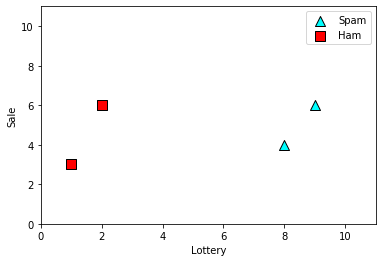

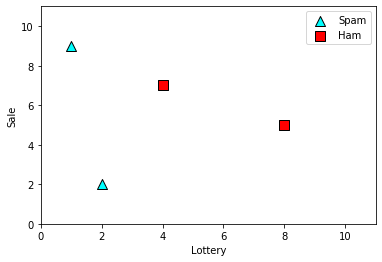

In [12]:
first_batch = new_spam_dataset.loc[[0,1,2,7,8,9]]
X1 = first_batch[['Lottery', 'Sale']]
y1 = first_batch['Spam']
utils.plot_points(X1, y1)
plt.show()

second_batch = new_spam_dataset.loc[[3,4,10,11]]
X2 = second_batch[['Lottery', 'Sale']]
y2 = second_batch['Spam']
utils.plot_points(X2, y2)
plt.show()

third_batch = new_spam_dataset.loc[[5,6,12,13]]
X3 = third_batch[['Lottery', 'Sale']]
y3 = third_batch['Spam']
utils.plot_points(X3, y3)

1.0
1.0
1.0


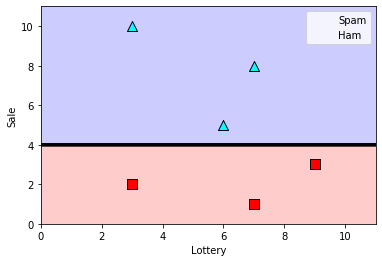

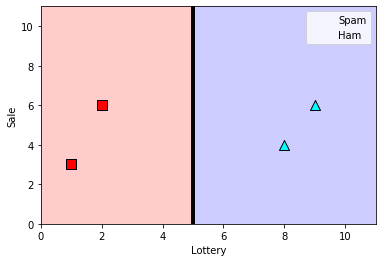

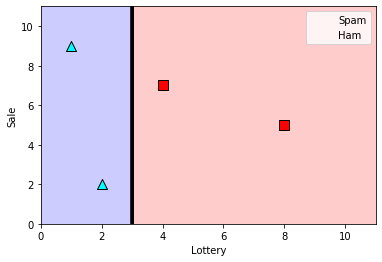

In [13]:
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(X1,y1)
print(dt1.score(X1,y1))

dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X2,y2)
print(dt2.score(X2,y2))

dt3 = DecisionTreeClassifier(random_state=0)
dt3.fit(X3,y3)
print(dt3.score(X3,y3))

utils.plot_model(X1, y1, dt1)
plt.show()
utils.plot_model(X2, y2, dt2)
plt.show()
utils.plot_model(X3, y3, dt3)

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=0, n_estimators=5)
random_forest_model.fit(new_X,new_y)
random_forest_model.score(new_X,new_y)

0.8571428571428571

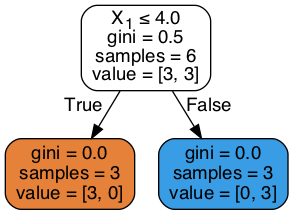

In [18]:
utils.display_tree(dt1)

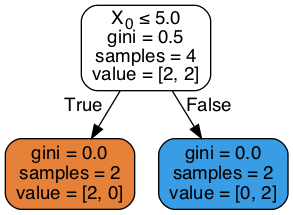

In [19]:
utils.display_tree(dt2)

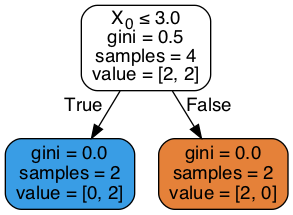

In [20]:
utils.display_tree(dt3)

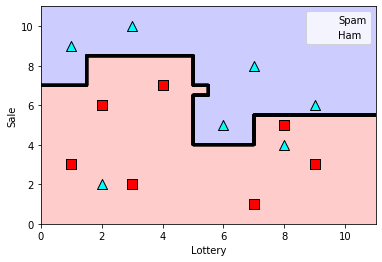

In [21]:
utils.plot_model(new_X, new_y, random_forest_model)

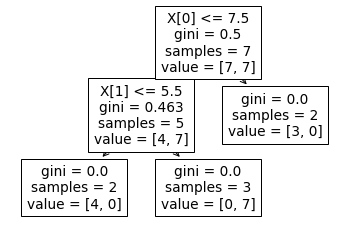

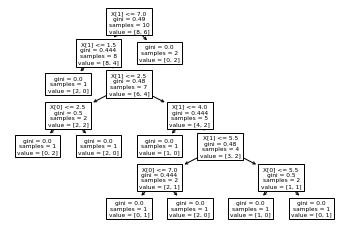

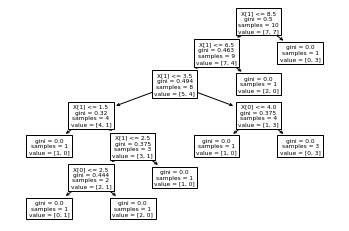

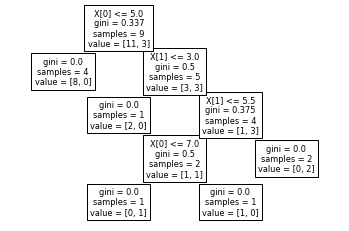

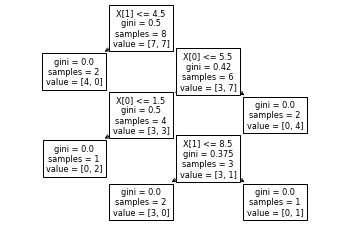

In [22]:
for dt in random_forest_model.estimators_:
    tree.plot_tree(dt)
    plt.show()

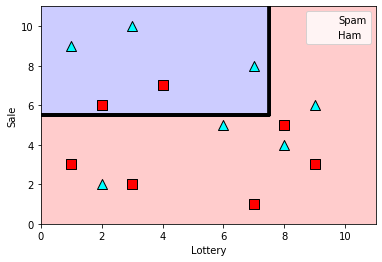

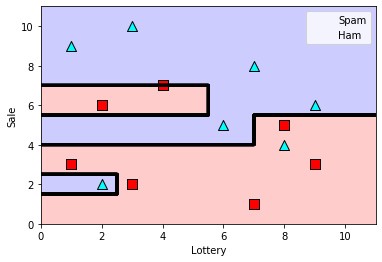

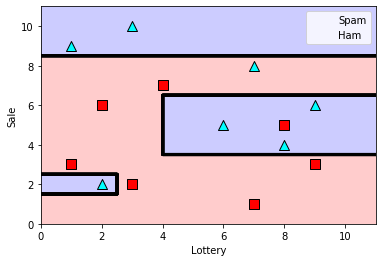

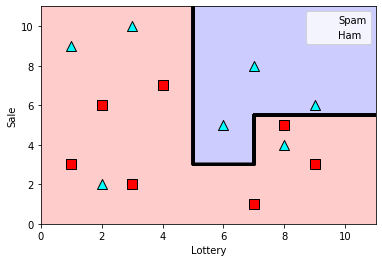

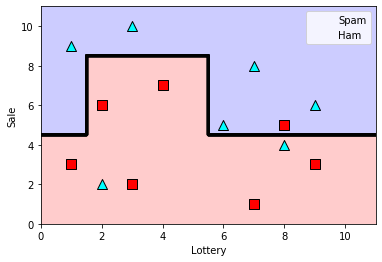

In [23]:
for dt in random_forest_model.estimators_:
    utils.plot_model(new_X, new_y, dt)
    plt.show()

# AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=0, n_estimators=6)
adaboost_model.fit(new_X, new_y)
adaboost_model.score(new_X, new_y)

0.8571428571428571

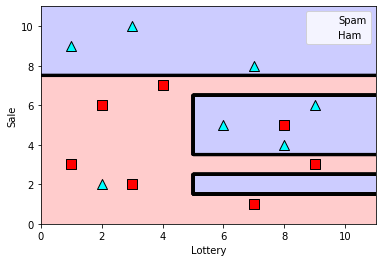

In [25]:
utils.plot_model(new_X, new_y, adaboost_model)

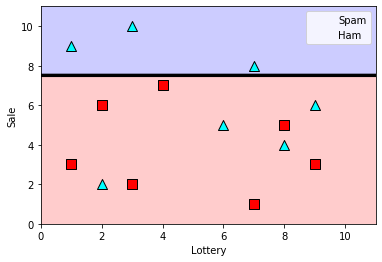

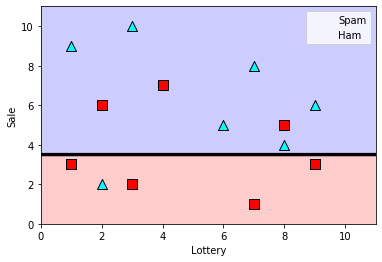

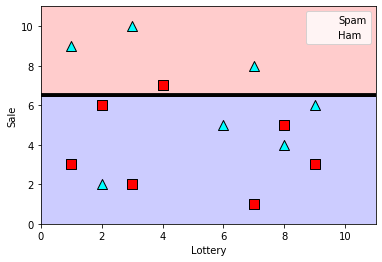

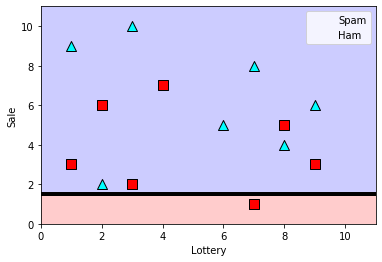

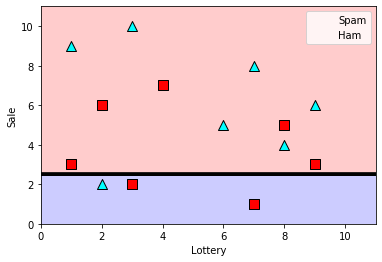

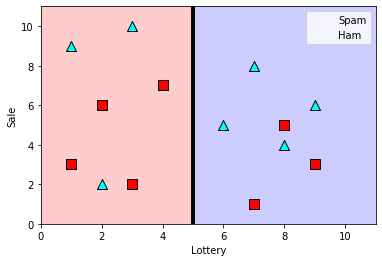

In [26]:
estimators = adaboost_model.estimators_
for estimator in estimators:
    utils.plot_model(new_X, new_y, estimator)
    plt.show()

In [27]:
adaboost_model.estimator_weights_

array([1., 1., 1., 1., 1., 1.])

# Gradient boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=0, n_estimators=5)
gradient_boosting_model.fit(new_X, new_y)
gradient_boosting_model.score(new_X, new_y)

0.9285714285714286

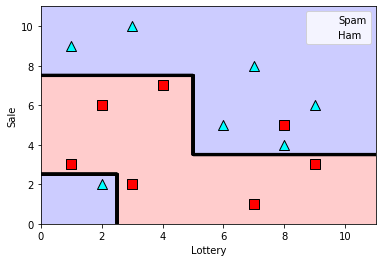

In [29]:
utils.plot_model(new_X, new_y, gradient_boosting_model)

In [30]:
estimators = gradient_boosting_model.estimators_

As an example, let us plot the first of the estimators.

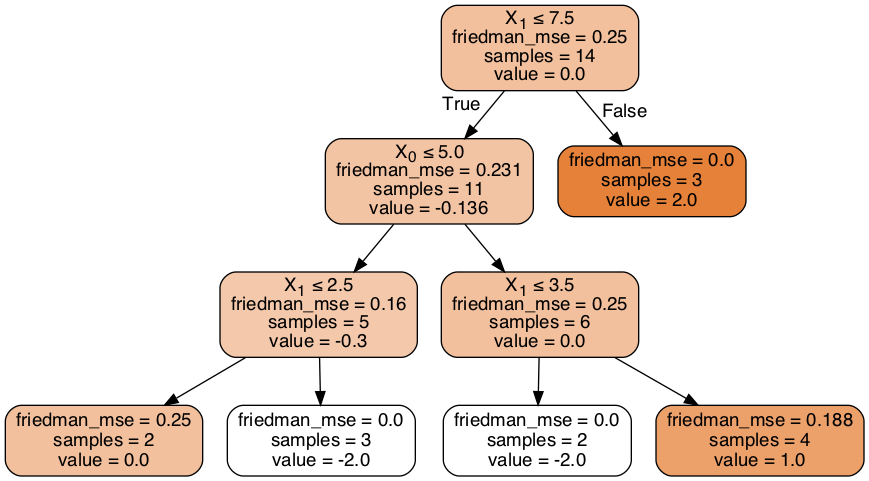

In [32]:
utils.display_tree(estimators[0][0])

# XGBoost

In [33]:
import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=0, n_estimators=5)
xgboost_model.fit(new_X, new_y)
xgboost_model.score(new_X, new_y)

0.7142857142857143